Text(0.5, 0.98, 'Comparasion of values of A and B')

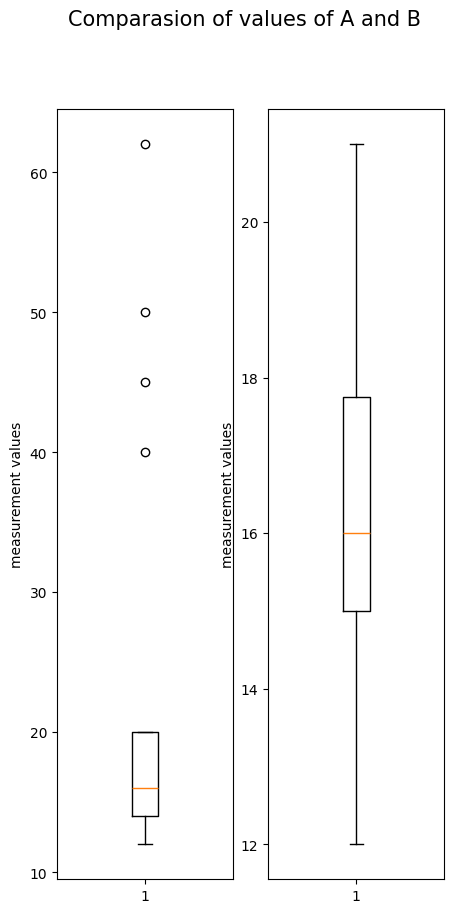

In [ ]:
#q1
import matplotlib.pyplot as plt
group_A = [12,15, 14, 13, 16, 18, 19, 15, 14, 20, 17, 14, 15, 40, 45, 50, 62]
group_B = [12, 17, 15, 13, 19, 20, 21, 18, 17, 16, 15, 14, 16, 15]
fig, (ax1,ax2) = plt.subplots(1,2 ,figsize = (5,10))
ax1.boxplot(group_A)
ax1.set_title = ('Box plot for group A')
ax1.set_ylabel('measurement values')
ax2.boxplot(group_B)
ax1.set_title = ('Box plot for group B')
ax2.set_ylabel('measurement values')

fig.suptitle('Comparasion of values of A and B' , fontsize=15)



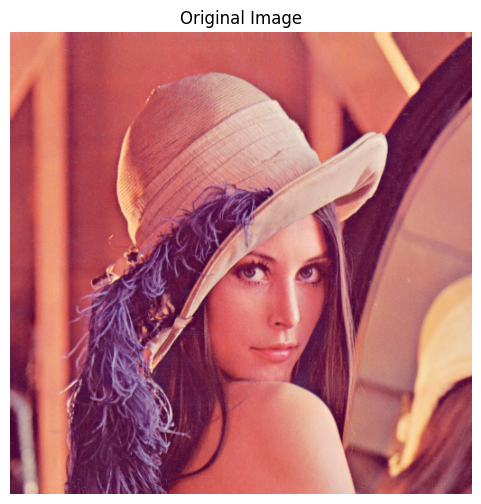

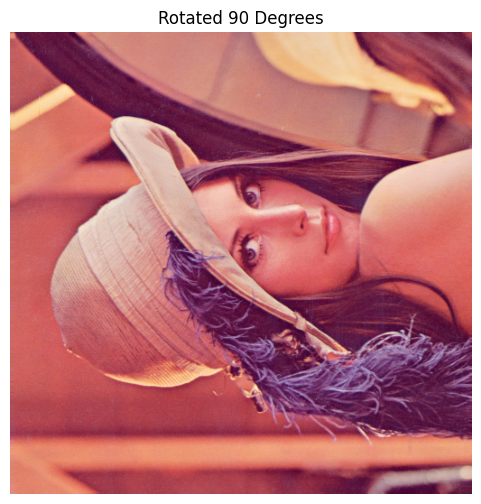

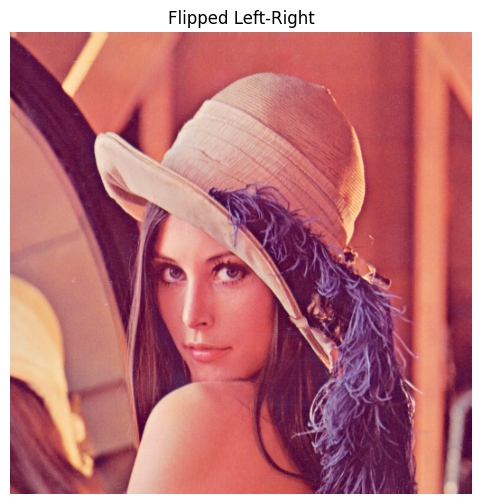

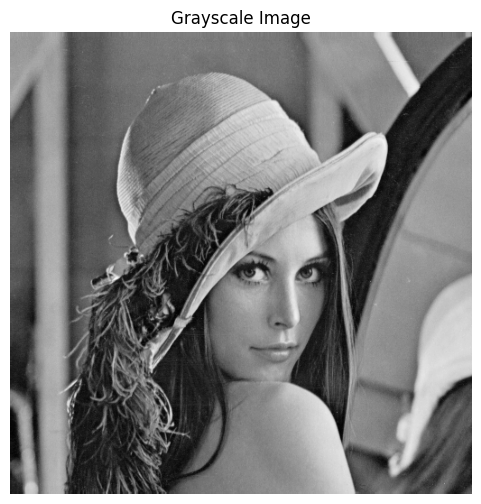

In [2]:
#q3

import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlopen
from PIL import Image

# downloading original image from internet
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
with urlopen(url) as response:
    img = Image.open(response)
    img_array = np.array(img)

# original image
plt.figure(figsize=(6, 6))
plt.imshow(img_array)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Rotate 90 degrees and plot
rotated_img = np.rot90(img_array)
plt.figure(figsize=(6, 6))
plt.imshow(rotated_img)
plt.title('Rotated 90 Degrees')
plt.axis('off')
plt.show()

# flip left-right and plot
flipped_img = np.fliplr(img_array)
plt.figure(figsize=(6, 6))
plt.imshow(flipped_img)
plt.title('Flipped Left-Right')
plt.axis('off')
plt.show()

# grayscale and plot
rgb_array = img_array[..., :3]
gray_img = np.dot(rgb_array, [0.299, 0.587, 0.114]).astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

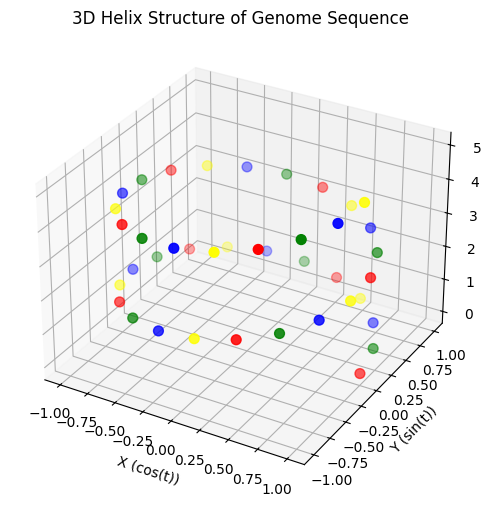

In [4]:
# q2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create file if not already
try:
    with open('helix_sequences.txt', 'r') as file:
        genome_sequence = list(file.read().strip())
except FileNotFoundError:
    # sample genome sequence
    sample_sequence = "ATCG" * 10
    with open('helix_sequences.txt', 'w') as file:
        file.write(sample_sequence)
    # reload the file
    with open('helix_sequences.txt', 'r') as file:
        genome_sequence = list(file.read().strip())

genome_length = len(genome_sequence)

# compute helix coordinates using given
t = np.linspace(0, 4 * np.pi, genome_length)
x = np.cos(t)
y = np.sin(t)
z = np.linspace(0, 5, genome_length)

coordinates = np.column_stack((x, y, z))

# Assign colors
color_map = {'A': 'red', 'T': 'green', 'C': 'blue', 'G': 'yellow', 'default': 'gray'}
colors = [color_map.get(base, color_map['default']) for base in genome_sequence]

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors, s=50, depthshade=True)
ax.set_xlabel('X (cos(t))')
ax.set_ylabel('Y (sin(t))')
ax.set_zlabel('Z')
ax.set_title('3D Helix Structure of Genome Sequence')
plt.show()

Mean of each feature: [5.84333333 3.05733333 3.758      1.19933333]
Median of each feature: [5.8  3.   4.35 1.3 ]
Standard deviation of each feature: [0.82530129 0.43441097 1.75940407 0.75969263]
Minimum values: [4.3 2.  1.  0.1]
Maximum values: [7.9 4.4 6.9 2.5]

Sepal features (length & width):
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


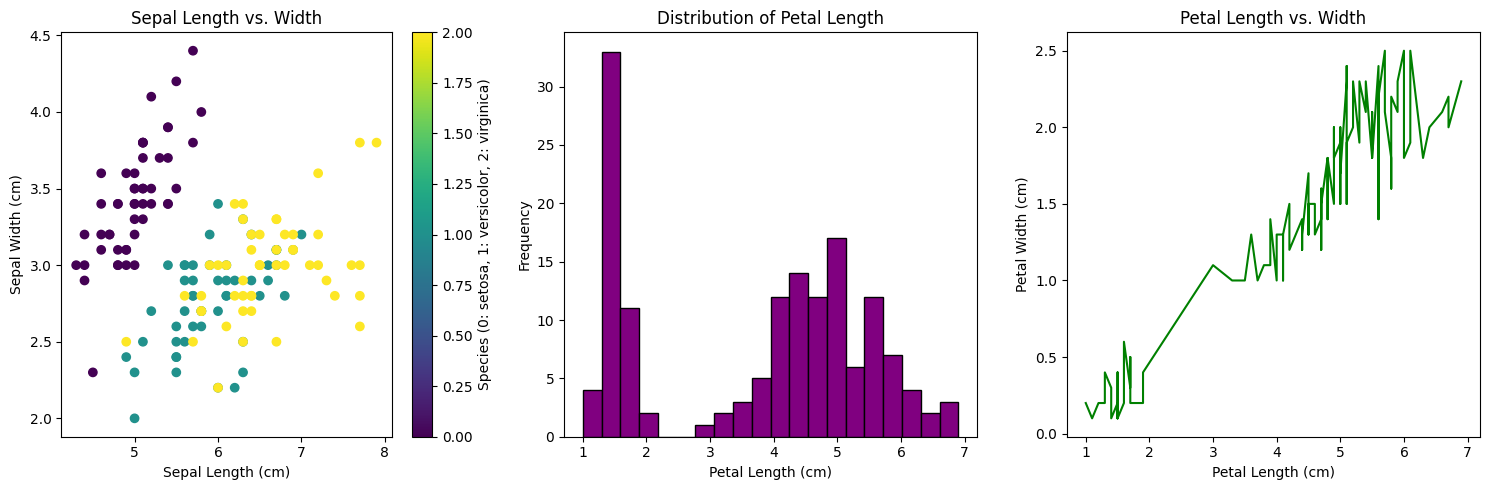

In [7]:
#q4
# below given dummy data
# from sklearn.datasets import load_iris
# import numpy as np
# Load the Iris dataset
# iris = load_iris()
# Accessing the features (data) using NumPy array
# X = np.array(iris.data) # (Features (sepal length, sepal width, petal length, petal width) #Accessing the target labels (species)
# Y = np.array(iris.data) # Target variable (species: 0 for setosa, 1 for versicolor, 2 for virginica)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = np.array(iris.data)
Y = np.array(iris.target)

mean_features = np.mean(X, axis=0)
median_features = np.median(X, axis=0)
std_features = np.std(X, axis=0)

min_features = np.min(X, axis=0)
max_features = np.max(X, axis=0)

sepal_features = X[:, :2]

print("Mean of each feature:", mean_features)
print("Median of each feature:", median_features)
print("Standard deviation of each feature:", std_features)
print("Minimum values:", min_features)
print("Maximum values:", max_features)
print("\nSepal features (length & width):\n", sepal_features[:5])  # for first 5 rows

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Width')
plt.colorbar(label='Species (0: setosa, 1: versicolor, 2: virginica)')

plt.subplot(1, 3, 2)
plt.hist(X[:, 2], bins=20, color='purple', edgecolor='black')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Petal Length')

plt.subplot(1, 3, 3)
# Sort by petal length
sorted_indices = np.argsort(X[:, 2])
plt.plot(X[sorted_indices, 2], X[sorted_indices, 3], 'g-')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs. Width')

plt.tight_layout()
plt.show()